In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
def load_dataset(filepath):
    return pd.read_csv(filepath)

df = load_dataset('D:/COLLEGE/Third semester/Data Science/Assignment Health DataSet/Health_heart_experimental.csv')
df.head(5)

,Unnamed: 0,age,sex,SysBP,DiaBP,HR,weightKg,heightCm,BMI,indication
0,0,64,1,141,96,128,69,147,32.0,1
1,1,21,1,109,100,106,48,150,21.0,0
2,2,30,0,112,73,126,69,183,21.0,0
3,3,35,1,106,90,130,45,149,20.0,0
4,4,39,0,140,90,112,92,166,33.0,1


# **LINE CHART**

In [63]:
df['HR'].describe()

count    71760.000000
mean       138.539298
std         35.239098
min         78.000000
25%        108.000000
50%        139.000000
75%        169.000000
max        199.000000
Name: HR, dtype: float64

 ``` We know that the max heart rate is calculated by subtracting your age from 220. For example: for a person with age 20(lowest in the age group), the max. heart rate will be 200(220-20). ```

In [64]:
df['age'].describe()

count    71760.000000
mean        44.453526
std         14.514111
min         20.000000
25%         32.000000
50%         44.000000
75%         57.000000
max         69.000000
Name: age, dtype: float64

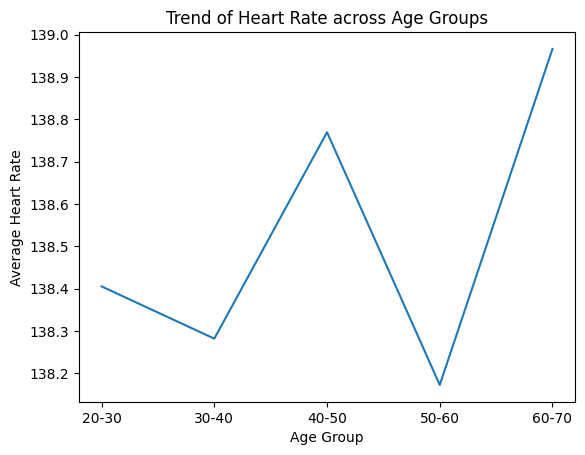

In [65]:
#labeling the age into Group
df['ageGroup'] = pd.cut( 
    df['age'],
    bins = [20, 30, 40, 50, 60, 70],
    labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
)

#observed=False is used to avoid futurewarnings in pandas
avg_HR = df.groupby('ageGroup', observed=False)['HR'].mean() #calculates the mean for each age group

plt.figure() #optional but used for controlling plot size
plt.plot(avg_HR.index, avg_HR.values) # X: agGroup Y: avg_HR
plt.xlabel("Age Group")
plt.ylabel('Average Heart Rate')
plt.title('Trend of Heart Rate across Age Groups') 
plt.show()  #renders the figure but not necessary

**Explanation: Trend of Heart Rate across Age Groups (Line Chart)**

This line chart shows how the average heart rate (HR) changes across different age groups. The age values were divided into groups of 10 years (20–30, 30–40, 40–50, 50–60, and 60–70), and the average heart rate was calculated for each group.

From the graph, we can see that the average heart rate remains relatively stable across all age groups, with only small increases and decreases. The heart rate slightly decreases from the 20–30 age group to the **30–40** age group, then increases in the **40–50** age group. A small drop is observed again in the **50–60** age group, followed by an increase in the **60–70** age group.

Overall, the visualization suggests that age does not cause a very large change in average heart rate in this dataset. The differences are minor, indicating that heart rate stays consistent across different age groups.

# **BAR PLOT**

In [66]:
# df['sex'].describe()

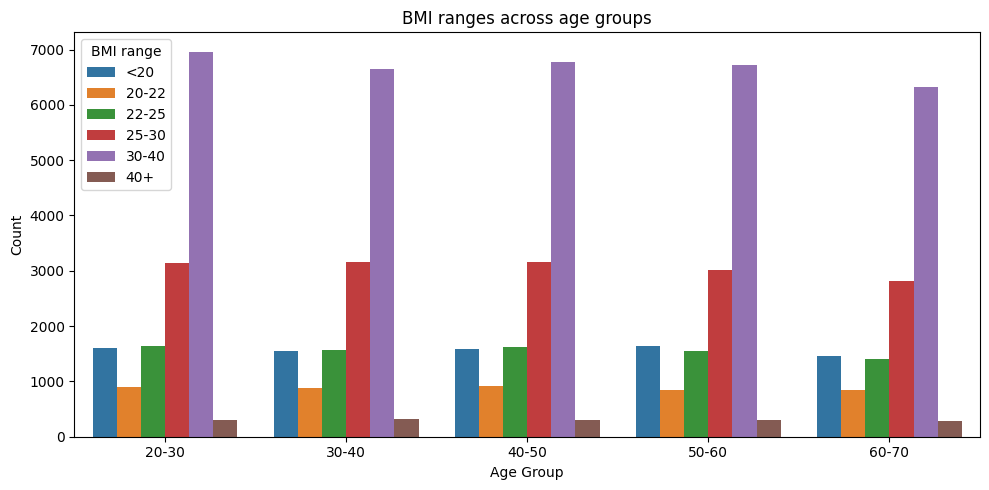

BMI
32.0    3603
34.0    3573
35.0    3563
36.0    3514
33.0    3510
37.0    3424
38.0    3417
30.0    3415
29.0    3321
27.0    3237
31.0    3208
28.0    3179
26.0    3035
39.0    2886
25.0    2867
24.0    2807
23.0    2694
22.0    2443
21.0    2375
20.0    2150
19.0    2079
18.0    1855
17.0    1532
40.0    1529
16.0    1212
15.0     856
14.0     432
13.0      44
Name: count, dtype: int64

In [67]:
#grouping the age
df['ageGroup'] = pd.cut( 
    df['age'],
    bins = [20, 30, 40, 50, 60, 70],
    labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
) 

#grouping the BMI
bmi_bins = [0.0, 20.0, 22.0, 25.0, 30.0, 40.0, float('inf')]
bmi_labels = ['<20', '20-22', '22-25', '25-30', '30-40', '40+']

#right=false means bins are left inclusive. So, [20,22) includes 20 but not 22 
df['BMI_range'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

plt.figure(figsize=(10, 5))

# to count the occurrences and hue to color the bmi_range
sns.countplot(
    data=df,
    x='ageGroup',
    hue='BMI_range',
    order=['20-30','30-40','40-50','50-60','60-70']
)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("BMI ranges across age groups")\

# adds a legend with title'BMI range'. without this title, legend displays BMI_range
plt.legend(title="BMI range") 

plt.tight_layout() #for better spacing
plt.show()  #optional for notebooks
df['BMI'].value_counts() #display the count of unique values

**Explanation: BMI Ranges Across Age Groups (Bar Chart)**

This bar chart shows how Body Mass Index (BMI) is distributed across different age groups. The age values are divided into five groups (20–30, 30–40, 40–50, 50–60, and 60–70). The BMI values are also grouped into ranges such as underweight (<20), normal weight (20–25), overweight (25–30), and obese (30 and above). Each age group contains multiple colored bars, where each color represents a different BMI range. The height of the bars indicates the number of people (count) falling into each BMI category within that age group.

From the graph, we observe that the 30–40 BMI range has the highest count in all age groups, indicating that most individuals fall into the overweight category. The 25–30 BMI range is also common across all ages. Lower BMI ranges (<20 and 20–22) have fewer individuals, while very high BMI values (40+) are the least frequent.

The visualization suggests that higher BMI values are more common across all age groups. This indicates a general trend of overweight and obesity being prevalent. Extreme obesity (BMI above 40) is rare, while underweight individuals form a smaller portion of the population.

# **PIE CHART**

Text(0.5, 1.0, 'Heart Condition Proportion')

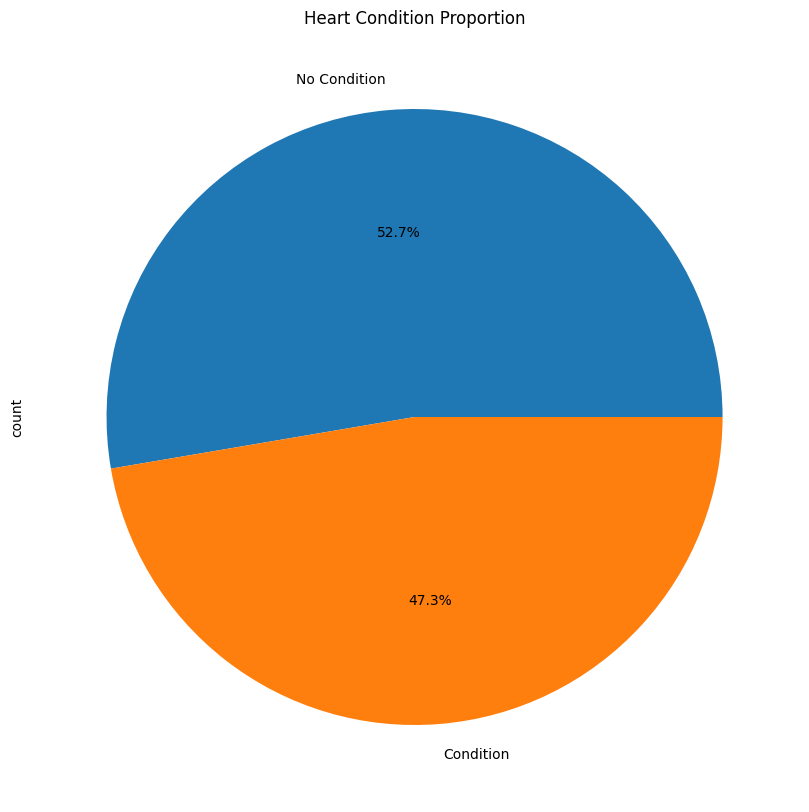

In [68]:
#creates a figure with size 15in wide by 10in tall
plt.figure(figsize=(15, 10))

#.value_counts(): counts the unique value in the indication column and autopct: displays the percentage
df['indication'].value_counts().plot.pie(autopct='%1.1f%%', labels=['No Condition', 'Condition'])
plt.title('Heart Condition Proportion')


**Explanation: Heart Condition Proportion (Pie Chart)**

This pie chart shows the proportion of people with and without a heart condition in the dataset. The data is divided into two categories: “Condition” and “No Condition.” Each slice of the pie represents the percentage of individuals in each category.

From the chart, we can see that 52.7% of the individuals do not have a heart condition, while 47.3% have a heart condition. The two portions are fairly close in size, indicating that the dataset contains a nearly balanced number of individuals with and without heart-related conditions.

The visualization suggests that almost half of the population in the dataset is affected by a heart condition. This highlights the importance of analyzing other health factors such as age, BMI, blood pressure, and heart rate to understand possible patterns or risk indicators associated with heart conditions.

# **BOX PLOT**

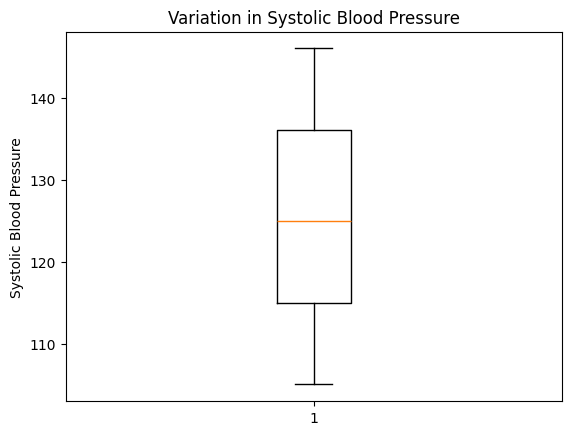

count    71760.000000
mean       125.477048
std         12.108559
min        105.000000
25%        115.000000
50%        125.000000
75%        136.000000
max        146.000000
Name: SysBP, dtype: float64

In [69]:
# box plot
plt.figure()
plt.boxplot(df['SysBP'])
plt.ylabel("Systolic Blood Pressure")
plt.title("Variation in Systolic Blood Pressure")
plt.show()

#calls describe() on possible SysBP column, outputs the summary stats
df['SysBP'].describe() 

**Explanation: Variation in Systolic Blood Pressure (Box Plot)**

This box plot shows the distribution and variation of systolic blood pressure (SysBP) values in the dataset. Here, we can see that the median systolic blood pressure is around 125 mmHg, which lies near the center of the box. Most systolic blood pressure values fall approximately between 115 mmHg and 135 mmHg, showing moderate variation. The lowest values are around 105 mmHg, while the highest values extend to about 145 mmHg.

This visualization suggests that most individuals have systolic blood pressure within a normal to slightly elevated range. However, the presence of higher values indicates that some individuals may have high blood pressure, which can increase the risk of heart-related problems.

# **SCATTER PLOT**

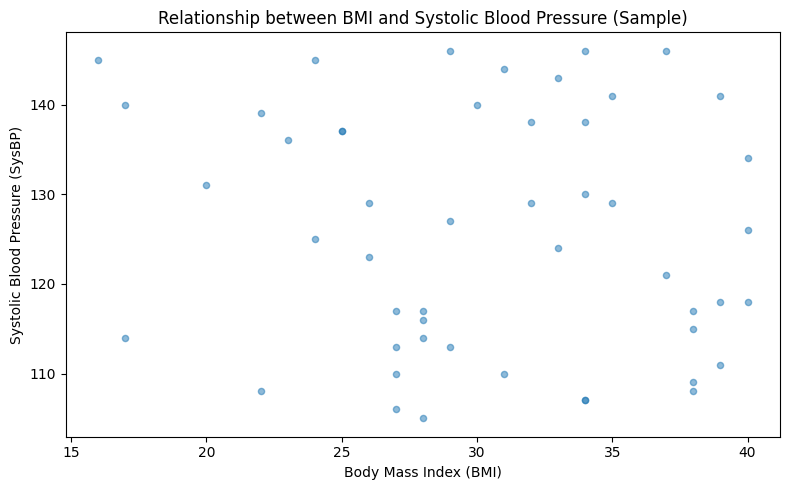

In [70]:
#Using a sample of data, n is no. of rows and random_state makes sure that u get same rows in every run.
sample_df = df.sample(n = 50, random_state = 42)

plt.figure(figsize=(8, 5))

#sets transparency to 0.5(50%) and point size to 20
plt.scatter(sample_df['BMI'], sample_df['SysBP'], alpha=0.5, s=20)

plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Systolic Blood Pressure (SysBP)')
plt.title('Relationship between BMI and Systolic Blood Pressure (Sample)')
plt.tight_layout() #
plt.show()

**Explanation: Relationship between BMI and Systolic Blood Pressure (Scatter Plot)**

This scatter plot shows the relationship between Body Mass Index (BMI) and systolic blood pressure (SysBP). The x-axis shows BMI values, while the y-axis shows systolic blood pressure readings. We can observe that as BMI increases, systolic blood pressure generally tends to increase. Individuals with lower BMI values mostly have lower or moderate blood pressure, whereas individuals with higher BMI values are more likely to have higher systolic blood pressure. The points are spread vertically for similar BMI values, which indicates that blood pressure can vary among individuals even if they have the same BMI.

The scattered nature of the points shows that BMI alone does not determine blood pressure, and other factors such as age, lifestyle, and overall health may also influence it.